# Análisis de datos - Trabajo final integrador

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQATNC-EBwF-LIbDVv_L0gkP2V6oKQzah5GRg&usqp=CAU"/>

Se propone realizar el ciclo completo del desarrollo de un modelo de aprendizaje automático supervisado.

Trabajaremos con un [dataset de Kaggle con datos de por distintas estaciones metereológicas de Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv).

El objetivo es predecir si lloverá o no al día siguiente (variable *RainTomorrow*), en función datos metereológicos del día actual.


## Enunciado

- Descargar el [dataset de kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv)

### 1. Análisis exploratorio inicial

- Visualizar las primeras filas.
- Realizar un resumen de 5 números.
- Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
- Identificar las variables de entrada y de salida del problema.
- Variables de entrada:
  - Realizar los siguientes análisis por tipo de variable.
    - Numéricas: 
      - Obtener conclusiones acerca de la distribución de los datos.
    - Categóricas
        - Obtener conclusiones acerca de cardinalidad, representación de cada categoría, etc.
    - Compuestas/otros. ¿Cómo pueden tratarse para utilizarlas en el problema elegido?
- Variables de salida:
  - ¿Están balanceadas las clases?
  - ¿Qué técnicas consideraría para codificar la variable de salida? Justificar.


In [1]:
# Importar librerías utiilzadas
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Inhabilitar warnings: remover las líneas siguientes para volverlos visibles
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Cargar datos y mostrar las primeras 5 filas
df = pd.read_csv("weatherAUS.csv")
df.head().T

,0,1,2,3,4
Date,2008-12-01,2008-12-02,2008-12-03,2008-12-04,2008-12-05
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28,32.3
Rainfall,0.6,0,0,0,1
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE,W
WindGustSpeed,44,44,46,24,41
WindDir9am,W,NNW,W,SE,ENE


In [3]:
# Resumen de las variables numéricas
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


### Identificación de tipo de datos:

1. Date: Cualitativo ordinal.
2. Location: Cualitativo nominal.
3. MinTemp: Cuantitativo contínuo.
4. MaxTemp: Cuantitativo contínuo.
5. Rainfall: Cuantitativo contínuo.
6. Evaporation: Cuantitativo contínuo.
7. Sunshine: Cuantitativo contínuo.
8. WindGustDir: Cualitativo ordinal.
9. WindGustSpeed: Cuantitativo contínuo.
10. WindDir9am: Cualitativo ordinal.
11. WindDir3pm: Cualitativo ordinal.
12. WindSpeed9am: Cuantitativo contínuo.
13. indSpeed3pm: Cuantitativo contínuo.
14. Humidity9am: Cuantitativo contínuo.
15. Humidity3pm: Cuantitativo contínuo.
16. Pressure9am: Cuantitativo contínuo.
17. Pressure3pm: Cuantitativo contínuo.
18. Cloud9am: Cuantitativo discreto.
19. Cloud3pm: Cuantitativo discreto.
20. Temp9am: Cuantitativo contínuo.
21. Temp3pm: Cuantitativo contínuo.
22. RainToday: Cualitativo nominal dicotómico.
23. RainTomorrow: Cualitativo nominal dicotómico.

### Análisis de variables de entrada y salida:

Las variables de 1 a 22 son de entrada y la 23 es de salida.

### Análisis de distribuciones de variables numéricas
#### Variables cuantitativas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012110906400>,
      dtype=object)

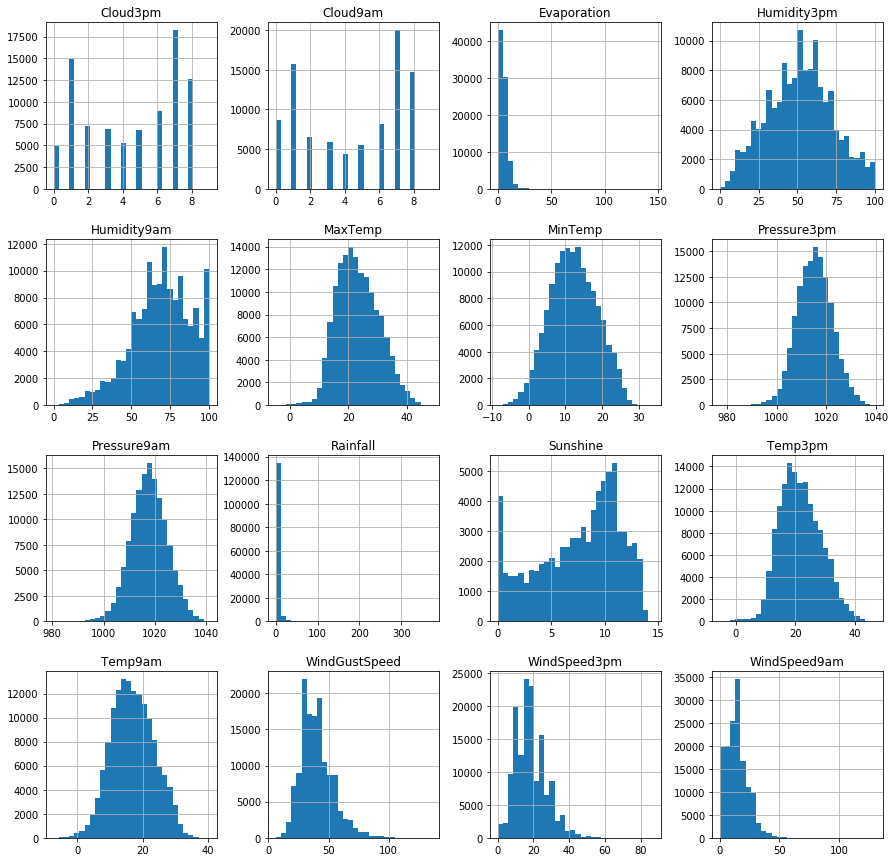

In [4]:
# Mostrar histogramas para cada una de las variables numéricas
df.hist(bins=30, figsize=(15, 15))

A partir de los histogramas anteriores se puede ver que algunas variables tienen una distribución
aproximadamente normal (`minTemp`, `maxTemp`, `Temp9am`, etc.) mientras que otras presentan mayores
frecuencias en valores alejados de la media (`Cloud9am` y `Cloud3pm` por ejemplo).
También me resulta llamativo que `Rainfall` y `Evaporation` tengan todos sus valores concentrados en los valores más bajos, mientras que las frecuencias para los valores más altos son inapreciables. Esto me hace
sospechar que puede haber outliers en la parte superior del rango.

#### Variables cualitativas

1. Date: Se puede transformar en cuantitativo discreto tomando los meses. Luego, si se interpretan los meses como ángulos (teniendo `2 * pi / 12` radianes de diferencia entre mes y mes) se pueden obtener dos variables discretas (seno y coseno del ángulo) que permiten representar la continuidad entre el mes 12 y el mes 1 (que se perdería al simplemente utilizar los meses como números).
2. Location: Se puede transformar en dos variables cuantitativas contínuas usando la latitud y longitud.
8. WindGustDir: Se puede transformar en dos variables cuantitativas discretas, interpretando el valor original como un ángulo, basándonos en la rosa de los vientos, y tomando el seno y el coseno del ángulo. Esto da una ventaja con respecto a la simple asignación de valores consecutivos a posiciones vecinas en la rosa de los vientos, dado que usar senos y cosenos permite evitar la discontinuidad que se daría entre el primer y el último valor utilizado.
10. WindDir9am: Ídem `WindGustDir`.
11. WindDir3pm: Ídem `WindGustDir`.
22. RainToday: Se puede convertir en una variable binaria.
23. RainTomorrow: Ídem `RainToday`.

### Variables de salida

Como fue mostrado en el inciso anterior, la variable de salida puede ser binarizada. Esto se debe a que son sólo dos valores posibles. Incluso, si usáramos _one-hot encoding_ tendríamos 2 columnas, donde el valor de una sería el opuesto de la otra, con lo cual conservar ambas sería redundante.

Respecto a si es balanceada o no, se muestra la siguiente celda.

In [5]:
# Conteo de frecuencia de cada valor de salida
pd.value_counts(df['RainTomorrow'])

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

Se puede ver que los días en los que no llueve son entre 3 y 4 veces más que los del caso opuesto, con lo cual se puede afirmar que **no están balanceadas las clases**. Una alternativa sería quitar filas en las cuales no llueve, pero eso llevaría a una gran pérdida de datos de entrenamiento.

### 2. Esquema de validación de resultados

- Los pasos siguientes comprenden las etapas de preparación de datos y evaluación de resultados. 
- Para ello, se debe particionar el dataset en entrenamiento y validación.



Para las particiones de datos entre entrenamiento y validación, voy a elegir la relación 80/20.

In [6]:
train, validation = train_test_split(df, test_size=0.2)

### 3. Limpieza y preparación de datos / ingeniería de features

- Datos faltantes. Indicar cantidad de observaciones y valores faltantes para cada variable.
- ¿Qué supuestos puede realizar acerca de los datos faltantes? ¿Qué técnicas de imputación recomendaría?. Ensayar distintas técnicas y analizar los resultados. 
- En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una técnica de codificación para cada variable. Cuando lo considere apropiado, ensayar distintas técnicas y comparar los resultados, teniendo en cuenta el tipo de clasificador a utilizar. Nota: para tipos de datos compuestos o estructurados, considerar la obtención de variables de tipo númerico/categórico.
- ¿Qué puede decir acerca de las relaciones entre las variables de entrada?

- Antes de entrenar un modelo de aprendizaje automático, ¿Podría identificar las variables de entrada de mayor importancia?. Considerar por lo menos dos técnicas para cada variable. Explique brevemente los métodos utilizados.



Primero vemos la cantidad de datos totales y faltantes:

In [7]:
# Cantidad total de datos
train.shape[0]

116368

In [8]:
# Cantidad de datos faltantes por columna
train.isna().sum()

Date                 0
Location             0
MinTemp           1208
MaxTemp           1015
Rainfall          2601
Evaporation      50252
Sunshine         55794
WindGustDir       8234
WindGustSpeed     8183
WindDir9am        8499
WindDir3pm        3378
WindSpeed9am      1403
WindSpeed3pm      2442
Humidity9am       2117
Humidity3pm       3599
Pressure9am      12037
Pressure3pm      12002
Cloud9am         44701
Cloud3pm         47456
Temp9am           1402
Temp3pm           2879
RainToday         2601
RainTomorrow      2633
dtype: int64

A partir de los números observados se puede ver que hay categorías en las cuales falta entre el 30% y el 50% de los datos:
- Evaporation
- Sunshine
- Cloud9am
- Cloud3pm
Y otras en las cuales faltan alrededor del 10% de los datos:
- WindGustDir
- WindGustSpeed
- WindDir9am
- Pressure9am
- Pressure3pm

Ahora analizo cuántos `NaN`s por fila hay

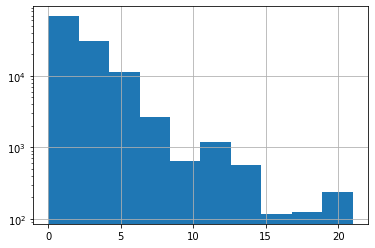

In [9]:
# Mostrar en un histograma los NaNs por fila
nans_row = train.isnull().sum(axis=1).tolist()
plt.hist(nans_row)
plt.yscale('log')
plt.grid()

En la gráfica anterior se puede ver que hay varias filas (aproximadamente 3000) en las cuales hay más de 10 `NaN`, con lo cual se pierden muchos valores de entrada simultáneamente. Considerando que son sólo un 2% de los datos, parece tener sentido descartar esas filas

In [10]:
# Mostrar los NaN por columna tras quitar del dataframe las filas con 10 o más NaN
train_nan_10 = train[train.isnull().sum(axis=1) < 10]
train_nan_10.isna().sum()

Date                 0
Location             0
MinTemp            222
MaxTemp            194
Rainfall          1660
Evaporation      48426
Sunshine         53792
WindGustDir       6438
WindGustSpeed     6395
WindDir9am        7039
WindDir3pm        1674
WindSpeed9am       258
WindSpeed3pm       759
Humidity9am        938
Humidity3pm       1886
Pressure9am       9760
Pressure3pm       9771
Cloud9am         42908
Cloud3pm         45048
Temp9am            261
Temp3pm           1193
RainToday         1660
RainTomorrow      1792
dtype: int64

In [11]:
# Aplico los mismos cambios a validation
validation_nan_10 = validation[validation.isnull().sum(axis=1) < 10]

A primera vista no parecen haberse reducido (al menos considerablemente) los `NaN` de las columnas con más ocurrencias de los mismos.

Sería interesante ver cuántas filas quedan en el dataframe tras quitar todas las columnas que contengan algún `NaN`:

In [12]:
# Ver cuántos datos quedan tras eliminar todas filas que tienen algún NaN
train_dropna = train.dropna()
train_dropna.shape

(45182, 23)

Se puede ver que el dataframe resultante tiene sólo un tercio de la cantidad inicial de filas, lo cual representa una gran pérdida de datos potencialmente útiles para el entrenamiento.

Por otro lado, tendría sentido desechar todas las filas que tienen `NaN` para la variable de salida, dado que no son muchas y podría causar problemas si les imputase un valor inadecuado.

In [13]:
# Retiro las filas que tienen NaN en la variable de salida
train_nan_10_filtered_out = train[train['RainTomorrow'].notnull()]
train_nan_10_filtered_out.isna().sum()

Date                 0
Location             0
MinTemp            517
MaxTemp            251
Rainfall          1107
Evaporation      48693
Sunshine         54174
WindGustDir       7428
WindGustSpeed     7379
WindDir9am        8051
WindDir3pm        3013
WindSpeed9am      1061
WindSpeed3pm      2089
Humidity9am       1402
Humidity3pm       2867
Pressure9am      11171
Pressure3pm      11140
Cloud9am         42896
Cloud3pm         45632
Temp9am            703
Temp3pm           2160
RainToday         1107
RainTomorrow         0
dtype: int64

In [14]:
# Aplico los mismos cambios a validation
validation_nan_10_filtered_out = validation[validation['RainTomorrow'].notnull()]

Nuevamente el filtrado implementado no redujo perceptiblemente la cantidad de `NaN`s en las columnas que más valores de ese tipo tienen

Finalmente voy a ver si la variable de salida tiene alguna relación con el hecho de que una variable sea `NaN` o no. De esta manera veo si el hecho de que sea `NaN` es relevante para calcular la salida o no.
El planteo es separar el dataframe en 2: por un lado las filas que generan un resultado positivo y por otro el resto de las filas. Si el hecho de que una variable sea NaN o no no influyera en el resultado, la distribución de `NaN`s en cada dataframe debería ser pareja.

La proporción esperada para RainTomorrow es de 0.22511100364883282


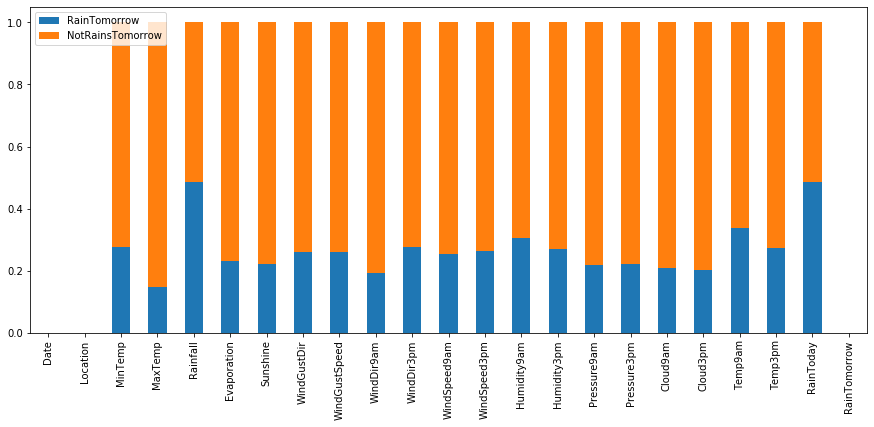

In [15]:
# Renombro los dataframes por algo más corto
train2 = train_nan_10_filtered_out
validation2 = validation_nan_10_filtered_out

# Hago un dataframe con los datos cuya salida es positiva y otro con el caso opuesto.
pd.DataFrame({
    'RainTomorrow': train2[train2['RainTomorrow'] == 'Yes'].isna().sum() / train2.isna().sum(),
    'NotRainsTomorrow': train2[train2['RainTomorrow'] == 'No'].isna().sum() / train2.isna().sum()
}).plot.bar(figsize=(15, 6), stacked=True)

print('La proporción esperada para RainTomorrow es de {}'.format(
    train2[train2['RainTomorrow'] == 'Yes']['RainTomorrow'].count() / train2['RainTomorrow'].count()))

A partir de la información anterior se puede ver que hay que tener particular cuidado a la hora de imputarle valores a `Rainfall`, `RainToday` principalmente, pero los valores de `Evaporation`, `Sunshine`, `Cloud9am` y `Cloud3pm` no son preocupantes. Desde este punto de vista no parecería peligroso descartar las filas con `NaN`s o imputarles un valor razonable (media o mediana, por ejemplo).

De todos modos, antes que eso me parece más sensato convertir las variables categóricas en numéricas para poder ver qué variables son las más importantes. Luego de eso podré descartar las menos importantes y finalmente imputaré valores a los `NaN`s de las columnas restantes.

In [16]:
# Remplazo las fechas por los meses
train2['Date'] = pd.to_datetime(train2['Date']).dt.month
train2.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
4837,3,BadgerysCreek,16.9,22.9,33.0,NaN,NaN,SE,30.0,S,...,85.0,76.0,1020.5,1020.3,NaN,NaN,19.0,21.7,Yes,No
78025,2,Watsonia,16.7,34.8,0.0,8.8,8.5,SSW,41.0,SE,...,82.0,36.0,1010.7,1006.8,7.0,1.0,18.0,31.0,No,No
110771,3,Albany,17.2,21.6,0.6,5.2,5.5,NaN,NaN,SE,...,87.0,74.0,1020.3,1017.9,7.0,7.0,18.5,20.0,No,No
77824,1,Portland,8.7,26.1,0.0,NaN,NaN,ESE,28.0,ESE,...,67.0,46.0,1013.0,1008.9,2.0,NaN,16.8,25.3,No,Yes
80662,7,Watsonia,6.2,13.4,0.0,2.6,4.7,N,65.0,NNW,...,78.0,59.0,1009.1,1005.3,6.0,7.0,9.1,12.7,No,Yes


In [17]:
# Ahora mapeo los meses como senos y cosenos. Proponiendo que diciembre sea el ángulo nulo
months = {}
for i in range(1, 13):
    angle = i * 2 * np.pi / 12
    months.update({i: {'cos': np.cos(angle), 'sin': np.sin(angle)}})
print(json.dumps(months, indent=4))

{
    "1": {
        "cos": 0.8660254037844387,
        "sin": 0.49999999999999994
    },
    "2": {
        "cos": 0.5000000000000001,
        "sin": 0.8660254037844386
    },
    "3": {
        "cos": 6.123233995736766e-17,
        "sin": 1.0
    },
    "4": {
        "cos": -0.4999999999999998,
        "sin": 0.8660254037844387
    },
    "5": {
        "cos": -0.8660254037844387,
        "sin": 0.49999999999999994
    },
    "6": {
        "cos": -1.0,
        "sin": 1.2246467991473532e-16
    },
    "7": {
        "cos": -0.8660254037844388,
        "sin": -0.4999999999999997
    },
    "8": {
        "cos": -0.5000000000000004,
        "sin": -0.8660254037844385
    },
    "9": {
        "cos": -1.8369701987210297e-16,
        "sin": -1.0
    },
    "10": {
        "cos": 0.5000000000000001,
        "sin": -0.8660254037844386
    },
    "11": {
        "cos": 0.8660254037844384,
        "sin": -0.5000000000000004
    },
    "12": {
        "cos": 1.0,
        "sin": -2.4492935982

In [18]:
# Genero a partir de Date: Date_cos y Date_sin
train2['Date_cos'] = train2['Date']
train2['Date_cos'].replace({key: value['cos'] for key, value in months.items()}, inplace=True)

train2.rename(columns = {'Date': 'Date_sin'}, inplace = True)
train2['Date_sin'].replace({key: value['sin'] for key, value in months.items()}, inplace=True)

train2.head()

,Date_sin,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_cos
4837,1.000000,BadgerysCreek,16.9,22.9,33.0,NaN,NaN,SE,30.0,S,...,76.0,1020.5,1020.3,NaN,NaN,19.0,21.7,Yes,No,6.123234e-17
78025,0.866025,Watsonia,16.7,34.8,0.0,8.8,8.5,SSW,41.0,SE,...,36.0,1010.7,1006.8,7.0,1.0,18.0,31.0,No,No,5.000000e-01
110771,1.000000,Albany,17.2,21.6,0.6,5.2,5.5,NaN,NaN,SE,...,74.0,1020.3,1017.9,7.0,7.0,18.5,20.0,No,No,6.123234e-17
77824,0.500000,Portland,8.7,26.1,0.0,NaN,NaN,ESE,28.0,ESE,...,46.0,1013.0,1008.9,2.0,NaN,16.8,25.3,No,Yes,8.660254e-01
80662,-0.500000,Watsonia,6.2,13.4,0.0,2.6,4.7,N,65.0,NNW,...,59.0,1009.1,1005.3,6.0,7.0,9.1,12.7,No,Yes,-8.660254e-01


In [19]:
# Remplazo los la ubicación por la latitud y longitud
train2['Latitude'] = train2['Location']
latitudes_dict = {
    'Albury': -36.073730,
    'BadgerysCreek': -33.887421,
    'Cobar': -31.494930,
    'CoffsHarbour': -30.296350,
    'Moree': -29.463551,
    'Newcastle': 32.9762964,
    'NorahHead': 33.2837329,
    'NorfolkIsland': 31.7427489,
    'Penrith': 33.7448104,
    'Richmond': 33.6057416,
    'Sydney': 33.8473552,
    'SydneyAirport': 33.9399183,
    'WaggaWagga': 35.1380069,
    'Williamtown': 37.8610963,
    'Wollongong': 34.4396078,
    'Canberra': 35.2812958,
    'Tuggeranong': 35.4765316,
    'MountGinini': 35.5293662,
    'Ballarat': 37.5672952,
    'Bendigo': 36.7370003,
    'Sale': 38.10603,
    'MelbourneAirport': 37.669008,
    'Melbourne': 37.9716913,
    'Mildura': 34.210665,
    'Nhil': 36.3060082,
    'Portland': 38.3567408,
    'Watsonia': 37.7099347,
    'Dartmoor': 37.8932172,
    'Brisbane': 27.381252,
    'Cairns': 16.8801501,
    'GoldCoast': 27.9538471,
    'Townsville': 19.2966267,
    'Adelaide': 34.999881,
    'MountGambier': 37.826287,
    'Nuriootpa': 34.4663903,
    'Woomera': 31.1667725,
    'Albany': 34.9920266,
    'Witchcliffe': 34.0131846,
    'PearceRAAF': 31.6675792,
    'PerthAirport': 31.938543,
    'Perth': 32.0391723,
    'SalmonGums': 32.8546419,
    'Walpole': 34.98415,
    'Hobart': 42.8344115,
    'Launceston': 41.4345956,
    'AliceSprings': 23.7206229,
    'Darwin': 12.4257239,
    'Katherine': 14.4664336,
    'Uluru': 25.3456376,
}
train2['Latitude'].replace(latitudes_dict, inplace=True)

longitudes_dict = {
    'Albury': 146.913544,
    'BadgerysCreek': 150.740509,
    'Cobar': 145.840164,
    'CoffsHarbour': 153.115692,
    'Moree': 149.841721,
    'Newcastle': 151.5492742,
    'NorahHead': 151.5572472,
    'NorfolkIsland': 150.0402983,
    'Penrith': 150.6719804,
    'Richmond': 150.7411209,
    'Sydney': 150.651109,
    'SydneyAirport': 151.1730824,
    'WaggaWagga': 147.3289317,
    'Williamtown': 144.8677045,
    'Wollongong': 150.7184796,
    'Canberra': 149.1248112,
    'Tuggeranong': 149.0149864,
    'MountGinini': 148.7635024,
    'Ballarat': 143.7825297,
    'Bendigo': 144.2121133,
    'Sale': 147.0355783,
    'MelbourneAirport': 144.8388333,
    'Melbourne': 144.7722715,
    'Mildura': 142.098499,
    'Nhil': 141.4408528,
    'Portland': 141.5744137,
    'Watsonia': 145.076271,
    'Dartmoor': 141.1708911,
    'Brisbane': 152.712328,
    'Cairns': 145.5765169,
    'GoldCoast': 153.2289349,
    'Townsville': 146.6850256,
    'Adelaide': 138.3302946,
    'MountGambier': 140.7630918,
    'Nuriootpa': 138.9490237,
    'Woomera': 136.781275,
    'Albany': 117.8518532,
    'Witchcliffe': 115.0768164,
    'PearceRAAF': 116.0270489,
    'PerthAirport': 115.9650552,
    'Perth': 115.6806691,
    'SalmonGums': 121.4065693,
    'Walpole': 116.729717,
    'Hobart': 147.2330969,
    'Launceston': 147.0662543,
    'AliceSprings': 133.8326704,
    'Darwin': 130.8630968,
    'Katherine': 132.2625566,
    'Uluru': 131.0283696,
}

train2['Location'].replace(longitudes_dict, inplace=True)
train2.rename(columns = {'Location': 'Longitude'}, inplace = True)
train2.head()

,Date_sin,Longitude,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_cos,Latitude
4837,1.000000,150.740509,16.9,22.9,33.0,NaN,NaN,SE,30.0,S,...,1020.5,1020.3,NaN,NaN,19.0,21.7,Yes,No,6.123234e-17,-33.887421
78025,0.866025,145.076271,16.7,34.8,0.0,8.8,8.5,SSW,41.0,SE,...,1010.7,1006.8,7.0,1.0,18.0,31.0,No,No,5.000000e-01,37.709935
110771,1.000000,117.851853,17.2,21.6,0.6,5.2,5.5,NaN,NaN,SE,...,1020.3,1017.9,7.0,7.0,18.5,20.0,No,No,6.123234e-17,34.992027
77824,0.500000,141.574414,8.7,26.1,0.0,NaN,NaN,ESE,28.0,ESE,...,1013.0,1008.9,2.0,NaN,16.8,25.3,No,Yes,8.660254e-01,38.356741
80662,-0.500000,145.076271,6.2,13.4,0.0,2.6,4.7,N,65.0,NNW,...,1009.1,1005.3,6.0,7.0,9.1,12.7,No,Yes,-8.660254e-01,37.709935


In [20]:
# Ordeno los puntos cardinales, partiendo del Norte y avanzando hacia el oeste
ptos_cardinales = [
    'N', 'NNW', 'NW', 'WNW', 'W', 'WSW', 'SW', 'SSW', 'S', 'SSE', 'SE', 'ESE', 'E', 'ENE', 'NE', 'NNE'
]

# Genero un diccionario como el utilizado para los meses
ptos_cardinales_dict = {}
for i, punto in enumerate(ptos_cardinales):
    angle = i * 2 * np.pi / len(ptos_cardinales)
    ptos_cardinales_dict.update({punto: {'cos': np.cos(angle), 'sin': np.sin(angle)}})

# Duplico las columnas con direcciones, renombro y populo con datos codificados
for col_name in ['WindGustDir', 'WindDir9am', 'WindDir3pm']:
    train2['{}_cos'.format(col_name)] = train2[col_name]
    train2['{}_cos'.format(col_name)].replace(
        {key: value['cos'] for key, value in ptos_cardinales_dict.items()},
        inplace=True
    )

    train2.rename(columns = {col_name: '{}_sin'.format(col_name)}, inplace = True)
    train2['{}_sin'.format(col_name)].replace(
        {key: value['sin'] for key, value in ptos_cardinales_dict.items()},
        inplace=True
    )

train2.head()

,Date_sin,Longitude,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir_sin,WindGustSpeed,WindDir9am_sin,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_cos,Latitude,WindGustDir_cos,WindDir9am_cos,WindDir3pm_cos
4837,1.000000,150.740509,16.9,22.9,33.0,NaN,NaN,-0.707107,30.0,1.224647e-16,...,NaN,19.0,21.7,Yes,No,6.123234e-17,-33.887421,-0.707107,-1.000000,-0.382683
78025,0.866025,145.076271,16.7,34.8,0.0,8.8,8.5,0.382683,41.0,-7.071068e-01,...,1.0,18.0,31.0,No,No,5.000000e-01,37.709935,-0.923880,-0.707107,-0.923880
110771,1.000000,117.851853,17.2,21.6,0.6,5.2,5.5,NaN,NaN,-7.071068e-01,...,7.0,18.5,20.0,No,No,6.123234e-17,34.992027,NaN,-0.707107,-0.707107
77824,0.500000,141.574414,8.7,26.1,0.0,NaN,NaN,-0.923880,28.0,-9.238795e-01,...,NaN,16.8,25.3,No,Yes,8.660254e-01,38.356741,-0.382683,-0.382683,-0.382683
80662,-0.500000,145.076271,6.2,13.4,0.0,2.6,4.7,0.000000,65.0,3.826834e-01,...,7.0,9.1,12.7,No,Yes,-8.660254e-01,37.709935,1.000000,0.923880,1.000000


In [21]:
# Binarizo las que tienen solo 2 valores posibles
for col_name in ['RainToday', 'RainTomorrow']:
    train2[col_name].replace({'Yes': True, 'No': False}, inplace=True)

train2.head()

,Date_sin,Longitude,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir_sin,WindGustSpeed,WindDir9am_sin,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_cos,Latitude,WindGustDir_cos,WindDir9am_cos,WindDir3pm_cos
4837,1.000000,150.740509,16.9,22.9,33.0,NaN,NaN,-0.707107,30.0,1.224647e-16,...,NaN,19.0,21.7,True,False,6.123234e-17,-33.887421,-0.707107,-1.000000,-0.382683
78025,0.866025,145.076271,16.7,34.8,0.0,8.8,8.5,0.382683,41.0,-7.071068e-01,...,1.0,18.0,31.0,False,False,5.000000e-01,37.709935,-0.923880,-0.707107,-0.923880
110771,1.000000,117.851853,17.2,21.6,0.6,5.2,5.5,NaN,NaN,-7.071068e-01,...,7.0,18.5,20.0,False,False,6.123234e-17,34.992027,NaN,-0.707107,-0.707107
77824,0.500000,141.574414,8.7,26.1,0.0,NaN,NaN,-0.923880,28.0,-9.238795e-01,...,NaN,16.8,25.3,False,True,8.660254e-01,38.356741,-0.382683,-0.382683,-0.382683
80662,-0.500000,145.076271,6.2,13.4,0.0,2.6,4.7,0.000000,65.0,3.826834e-01,...,7.0,9.1,12.7,False,True,-8.660254e-01,37.709935,1.000000,0.923880,1.000000


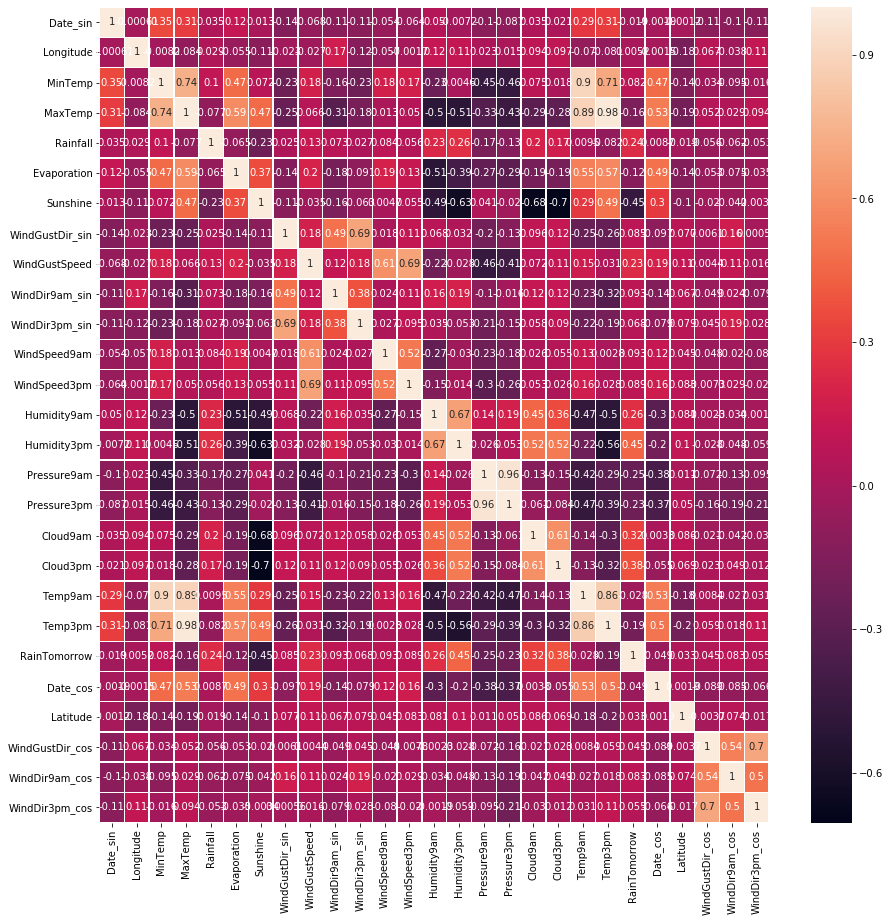

In [22]:
# Mostrar matriz de correlacion
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(train2.corr(), annot=True, linewidths=.5, ax=ax)

A partir de la imagen anterior se puede ver que hay conjuntos altamente correlacionados:

- `Temp9am`, `Temp3pm`, `MinTemp` y `MaxTemp`
- `Pressure9am` y `Pressure3pm`
- `WindGustDir_cos`, `WindDir9am_cos` y `WindDir3pm_cos`

Por otro lado, `Sunshine` tiena una fuerte correlación ngativa con las variables de humedad y nubes

Además, a juzgar por cómo están correlacionadas las variables con la variable de salida, las variables de entrada más importante parecerían ser `Sunshine`, `Humidity3pm`, `Cloud3pm` y `CLoud9am`.

### 4. Entrenamiento de modelos

- Recurriendo a los modelos que conozca, defina una lista de modelos candidatos a entrenar (puede ser el mismo tipo de clasificador con distintos hiperparámetros). Nota: no se contemplará el desempeño del modelo elegido, sino las conclusiones que puedan establecerse a partir de la preparación previa de los datos.

- Ensaye distintas cadenas de procesamiento con las técnicas consideradas en la sección 3 (por ejemplo, distintas técnicas de imputación, selección de variables de entrada, codificación de variables categóricas, transformación, etc.).


En primer lugar defino la métrica: parece sensato utilizar F1-score teniendo en cuenta que el dataset está desbalanceado.

En relación a los modelos a utilizar, optaré por regresión logística y random forest.

En cuanto a las variantes de pre-procesamiento, tengo las siguientes alternativas en mente:

- Eliminar primero las columnas que tienen cerca del 50% de `NaN`s y luego eliminar las filas que tengan `NaN`s.
- Eliminar todas las filas que tengan `NaN`s, conservando todas las columnas.


In [23]:
def reparametrizar(df):
    """
    Esta función hace la re-parametrización del dataframe,
    convirtiendo las columnas no-numéricas en otras que sí lo son.
    
    :param df: el dataframe de entrada.
    :return: un dataframe con todas sus columnas numéricas.
    """
    
    # Genero a partir de Date: Date_cos y Date_sin
    df['Date'] = pd.to_datetime(df['Date']).dt.month
    
    df['Date_cos'] = df['Date']
    df['Date_cos'].replace({key: value['cos'] for key, value in months.items()}, inplace=True)

    df.rename(columns = {'Date': 'Date_sin'}, inplace = True)
    df['Date_sin'].replace({key: value['sin'] for key, value in months.items()}, inplace=True)

    # Remplazo los la ubicación por la latitud y longitud
    df['Latitude'] = df['Location']
    df['Latitude'].replace(latitudes_dict, inplace=True)
    df['Location'].replace(longitudes_dict, inplace=True)
    df.rename(columns = {'Location': 'Longitude'}, inplace = True)
    
    # Duplico las columnas con direcciones, renombro y populo con datos codificados
    for col_name in ['WindGustDir', 'WindDir9am', 'WindDir3pm']:
        df['{}_cos'.format(col_name)] = df[col_name]
        df['{}_cos'.format(col_name)].replace(
            {key: value['cos'] for key, value in ptos_cardinales_dict.items()},
            inplace=True
        )

        df.rename(columns = {col_name: '{}_sin'.format(col_name)}, inplace = True)
        df['{}_sin'.format(col_name)].replace(
            {key: value['sin'] for key, value in ptos_cardinales_dict.items()},
            inplace=True
        )
    
    # Binarizo las que tienen solo 2 valores posibles
    for col_name in ['RainToday', 'RainTomorrow']:
        df[col_name].replace({'Yes': True, 'No': False}, inplace=True)

    return df

In [24]:
def evaluar(metodo, train, validate):
    """
    Esta función genera un modelo, lo entrena, predice para el dataset de validación e imprime las métricas
    
    :param metodo: instancia del método a utilizar
    :param train: el df de training.
    :param validate: el df de validación.
    """
    
    # Separar datasets en entrada y salida
    train_output = train['RainTomorrow'].to_numpy()
    train_input = train.loc[:, train.columns != 'RainTomorrow'].to_numpy()
    
    validate_output = validate['RainTomorrow'].to_numpy()
    validate_input = validate.loc[:, validate.columns != 'RainTomorrow'].to_numpy()    
    
    # Normalizar los conjuntos
    mean = np.mean(train_input, axis=0)
    std = np.std(train_input, axis=0, dtype=np.float32)
    train_input = (train_input - mean) / std
    validate_input = (validate_input - mean) / std
    
    # Entrenar, predecir y mostrar métrica
    modelo = metodo.fit(train_input, train_output)
    metodo_str = 'Logistic Regression' if type(metodo) == LogisticRegression else 'Random Forest'
    print('el F1-score en testing para {} fue de :'.format(metodo_str),
          f1_score(train_output, modelo.predict(train_input)))
    print('el F1-score en validación para {} fue de :'.format(metodo_str),
          f1_score(validate_output, modelo.predict(validate_input)))


In [25]:
# Caso 1:
#
# Eliminar primero las columnas que tienen cerca del 50% de NaNs y luego eliminar las filas que tengan NaNs.

# Genero un set de training con las condiciones mencionadas
cols_drop = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']
train_1 = train2.copy()
train_1.drop(columns=cols_drop, inplace=True)
train_1.dropna(inplace=True)
print('El set de entrenamiento del caso 1 tiene {} filas'.format(train_1.shape[0]))

# Aplico lo mismo en el test de validación
validation_1 = validation2.copy()
validation_1.drop(columns=cols_drop, inplace=True)
validation_1.dropna(inplace=True)

# Caso 2:
#
# Eliminar todas las filas que tengan NaNs, conservando todas las columnas.

# Genero un set de training con las condiciones mencionadas
train_2 = train2.copy()
train_2.dropna(inplace=True)
print('El set de entrenamiento del caso 2 tiene {} filas'.format(train_2.shape[0]))

# Aplico lo mismo en el test de validación
validation_2 = validation2.copy()
validation_2.dropna(inplace=True)

# Reparametrizo todos los datasets de validación, ya que los de training ya fueron reparametrizados
validation_1 = reparametrizar(validation_1)
validation_2 = reparametrizar(validation_2)


El set de entrenamiento del caso 1 tiene 90367 filas
El set de entrenamiento del caso 2 tiene 45182 filas


In [28]:
# Corro ambos métodos para ambos datasets
for i, (train, validation) in enumerate([[train_1, validation_1], [train_2, validation_2]]):
    print('Evaluating dataset {}'.format(i + 1))
    print()
    for method in [LogisticRegression(), RandomForestClassifier(), RandomForestClassifier(max_depth=8)]:
        evaluar(method, train, validation)
        print()


Evaluating dataset 1

el F1-score en testing para Logistic Regression fue de : 0.6033470346447446
el F1-score en validación para Logistic Regression fue de : 0.5999042833213688

el F1-score en testing para Random Forest fue de : 0.9736380506901899
el F1-score en validación para Random Forest fue de : 0.5925284512617516

el F1-score en testing para Random Forest fue de : 0.5972666290514702
el F1-score en validación para Random Forest fue de : 0.5772242906663243

Evaluating dataset 2

el F1-score en testing para Logistic Regression fue de : 0.6241037113520336
el F1-score en validación para Logistic Regression fue de : 0.6154942965779467

el F1-score en testing para Random Forest fue de : 0.9733925744344006
el F1-score en validación para Random Forest fue de : 0.5975247524752475

el F1-score en testing para Random Forest fue de : 0.6303468562323814
el F1-score en validación para Random Forest fue de : 0.5822720326031584



### 5. Evaluación de resultados y conclusiones

- ¿Qué puede concluir acerca de los modelos y preparaciones de datos ensayadas? Tener en cuenta como cada preparación afecta a los distintos modelos.

Tras las primeras iteraciones pude ver que tanto logistic regression como random forest generaban un f1-score de alrededor de 0.6, lo cual me parece demasiado bajo. Intentando encontrar la causa de esto, me pareció que el problema podría estar relacionado al overfitting.

Por esto pasé de sólo mostrar el f1-score de validación a hacerlo también con el set de entrenamiento. Al hacerlo pude comprobar que, mientras logistic regression logra resultados similares tanto en testing como en validación, no sucede lo mismo con random forest: ¡el score en training ronda los 0.97!

A raíz de esto, decidí limitar la profundidad máxima de random forest, pero con esto sólo logré bajar la puntuación en el set de entrenamiento, sin que esto signifique una mejora en el set de validación

### 6. Presentación de resultados

- Elabore un informe de dos o tres páginas describiendo el procedimiento realizado y las conclusiones importantes indicando la ruta del código fuente en git.